___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

**Objective of the project**<br>
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. This project would fall under what is commonly known as HR Analytics or People Analytics.

### Importing Modules

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [195]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [197]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'Departments ' : 'department',
                        'left' : 'Attrition'
                        })

In [198]:
# Let's first check for any duplicate records
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 3008


In [199]:
#df[df.duplicated()]

In [200]:
#df[(df['satisfaction_level']==0.46)&(df['last_evaluation']==0.57)&(df['average_montly_hours']==139)]

In [201]:
# Drop duplicate records
df_Churn = df[~df.duplicated()]
df_Churn.shape

(11991, 10)

In [202]:
df_Churn.describe(include = 'object')

,department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


In [203]:
df_Churn.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


data has 2 categorical variable and 8 numerical variable.

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [204]:
# Overview of summary (Attrition )
# satisfaction level id a deteminant factor to stay in a company, working hours mean of left workers significantly more the others. 
turnover_Summary = df_Churn.groupby('Attrition')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Attrition,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion
satisfaction,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
projectCount,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
averageMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
yearsAtCompany,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
Attrition,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


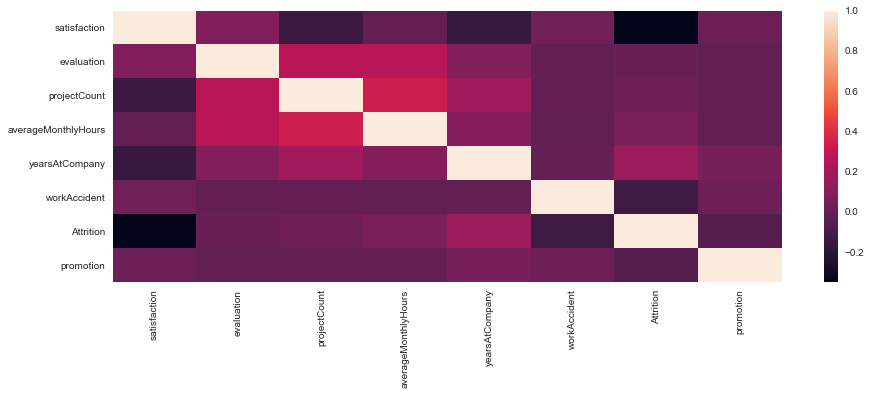

In [205]:
#Correlation Matrix
corr = df_Churn.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

**It is observed that target class has no significant correlation with any independet variables.**<br>
Highest correlated variable is satisfaction and there is no multicolinarity betwwent he independent variables.

In [128]:
#pip install autoviz

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [206]:
df_Churn.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Attrition', 'promotion',
       'department', 'salary'],
      dtype='object')

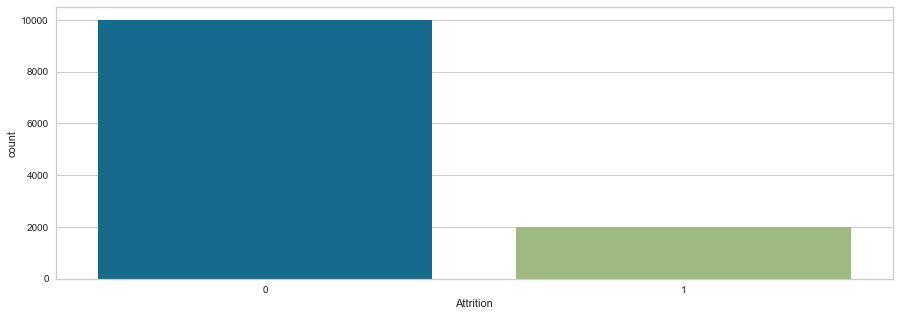

In [207]:
# target feature class distribution is imbalanced
sns.countplot(df_Churn.Attrition);

### Feature Engineering

In [208]:
df_Churn['productivity'] = df_Churn['projectCount']/df_Churn['yearsAtCompany']

/Users/ademarslan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
#df_Churn.columns

**Distribution of Satisfaction-Evaluation-AverageMonthlyHours**<br>
- some of the employee satisfaction is less than 0.2 which cause to leave the job. <br>
- employer evaluation is generally more than 0.5 which is a good indicator of employee performance. <br>
- average monthly hours distributio shows that some of the employees are overloaded which may cause employee dissatisfaction.

Text(0, 0.5, 'Employee Count')

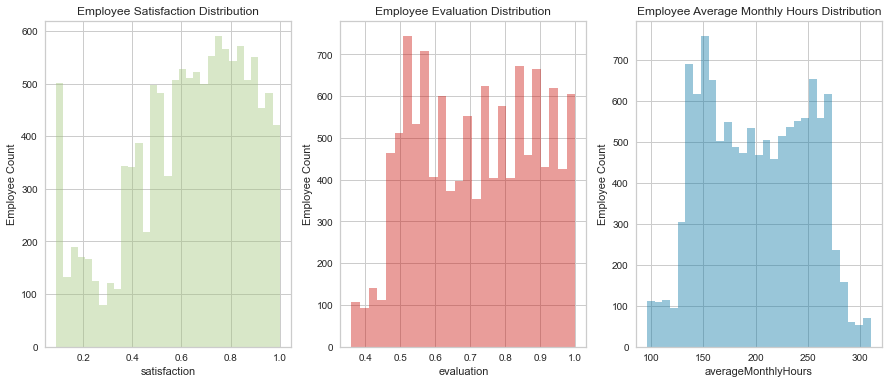

In [210]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df_Churn.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df_Churn.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df_Churn.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

**Salary&Attrition**<br>
- Majority of employees who left either had low or medium salary.<br>
- Barely any employees left with high salary<br>
- Employees with low to average salaries tend to leave the company.

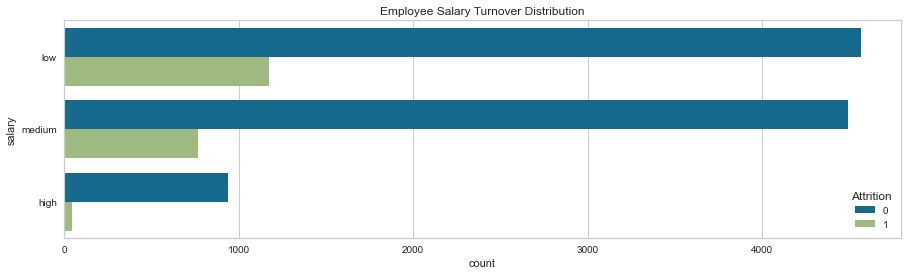

In [211]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='Attrition', data=df_Churn).set_title('Employee Salary Attrition Distribution');

**Department V.S. Attrition**<br>
- The sales, technical, and support department were the top 3 departments to have employee Attrition<br>
- The management department had the smallest amount of Attrition

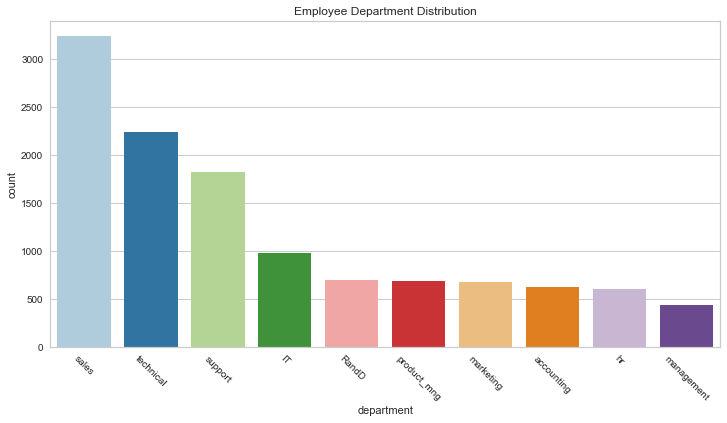

In [216]:
# Employee distribution
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=[12,6])
sns.countplot(x='department', data=df_Churn,order=df_Churn['department'].value_counts().index, palette='Paired').set_title('Employee Department Distribution');
# Rotate x-labels
plt.xticks(rotation=-45);

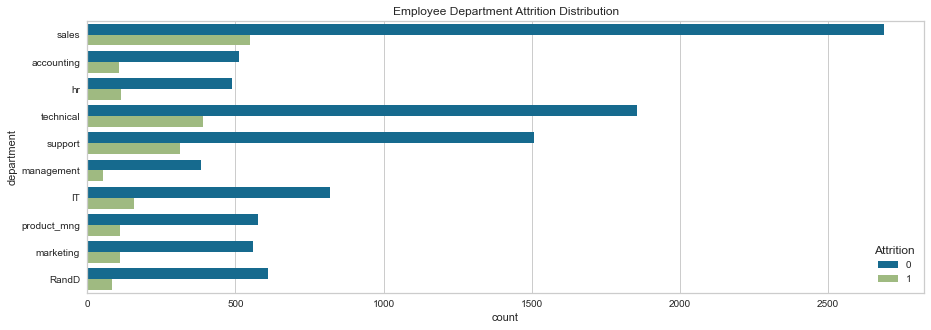

In [217]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='Attrition', data=df_Churn).set_title('Employee Department Attrition Distribution');

**Attrition V.S. ProjectCount**
- More than half of the employees with 2,6, and 7 projects left the company<br>
- Majority of the employees who did not leave the company had 3,4, and 5 projects<br>
- All of the employees with 7 projects left the company<br>
- There is an increase in employee Attrition rate as project count increases

[Text(0, 0.5, 'Percent')]

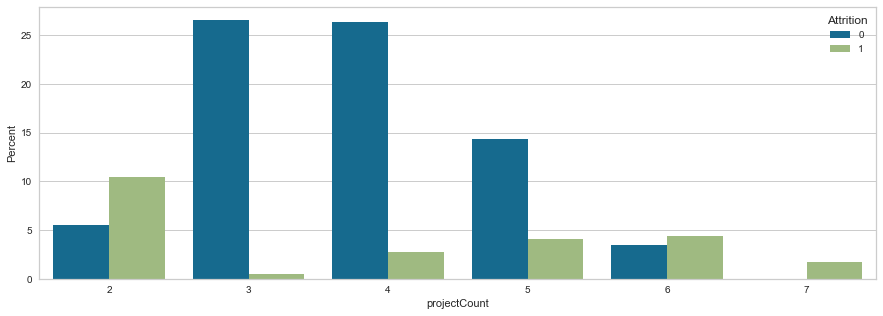

In [218]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="Attrition", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

**Attrition V.S. Evaluation**
- There is a biomodal distribution for those that had a attrition. <br>
- Employees with low performance tend to leave the company more. <br>
- Employees with high performance tend to leave the company more. <br>
- The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Attrition V.S. No Attrition')

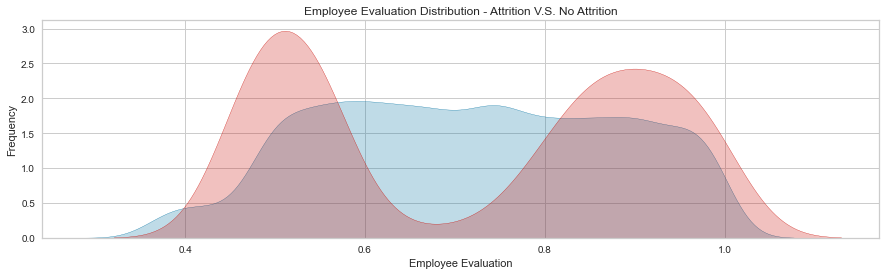

In [219]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 0),'evaluation'] , color='b',shade=True,label='no Attrition')
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 1),'evaluation'] , color='r',shade=True, label='Attrition')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Attrition V.S. No Attrition')

**Attrition V.S. AverageMonthlyHours**<br>
- Another bi-modal distribution for employees that Attrition<br>
- Employees who had less hours of work (150hours or less) left the company more<br>
- Employees who had too many hours of work (250 or more) left the company<br>
- Employees who left generally were underworked or overworked.

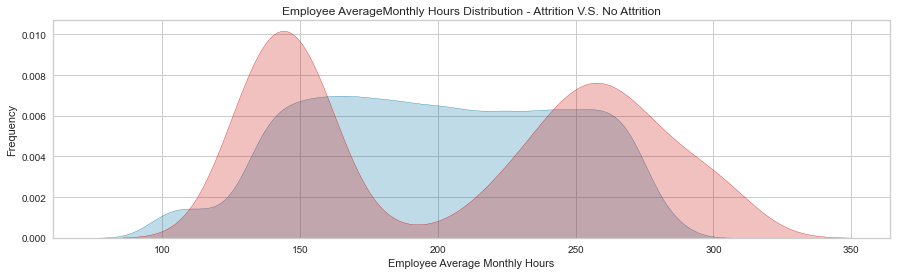

In [220]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no Attrition')
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='Attrition')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Attrition V.S. No Attrition');

**Attrition V.S. Satisfaction**<br>
- There is a tri-modal distribution for employees that turnovered<br>
- Employees who had really low satisfaction levels (0.2 or less) left the company more<br>
- Employees who had low satisfaction levels (0.3~0.5) left the company more<br>
- Employees who had really high satisfaction levels (0.7 or more) left the company more

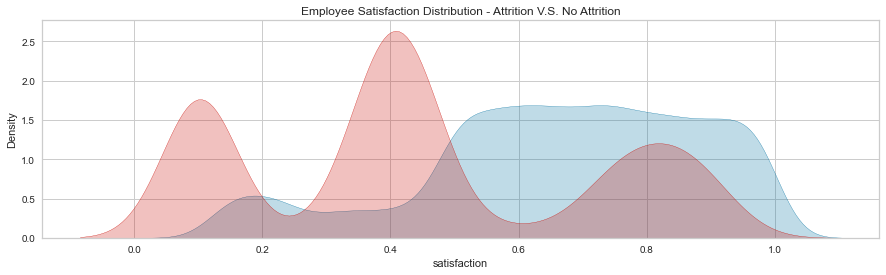

In [221]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 0),'satisfaction'] , color='b',shade=True, label='no Attrition')
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 1),'satisfaction'] , color='r',shade=True, label='Attrition')
plt.title('Employee Satisfaction Distribution - Attrition V.S. No Attrition');

**ProjectCount VS AverageMonthlyHours**<br>
- As project count increased, so did average monthly hours<br>
- Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had an Attrition and did not.<br>
- Looks like employees who did not have an Attrition had consistent averageMonthlyHours, despite the increase in projects<br>
- In contrast, employees who did have a Attrition had an increase in averageMonthlyHours with the increase in projects

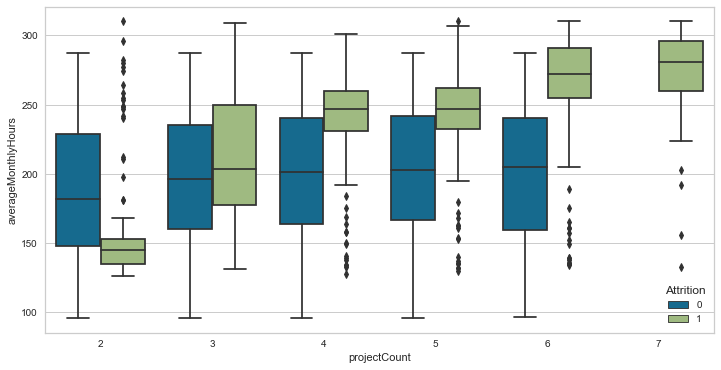

In [222]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a Attrition worked about 250hours/month and 150hours/month
plt.figure(figsize=[12,6])
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="Attrition", data=df_Churn);

**ProjectCount VS Evaluation**<br>
- This graph looks very similar to the graph above. What I find strange with this graph is with the Attrition group. There is an increase in evaluation for employees who did more projects within the Attrition group. But, again for the non-Attrition group, employees here had a consistent evaluation score despite the increase in project counts.

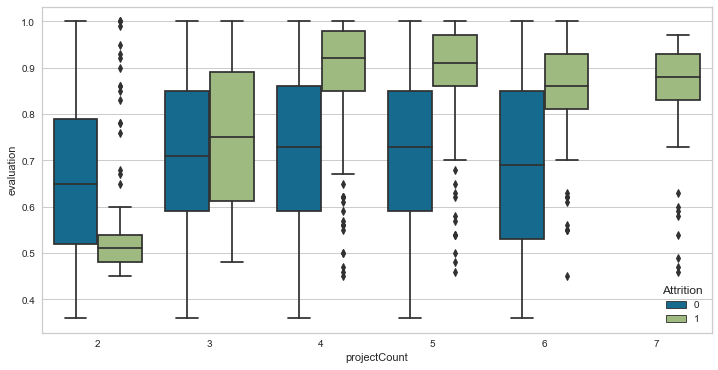

In [223]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a Attrition though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
plt.figure(figsize=[12,6])
sns.boxplot(x="projectCount", y="evaluation", hue="Attrition", data=df_Churn);


**Satisfaction&AverageMonthlyHours**
- Satisfaction was below 0.2 and AverageMonthlyHours were greater than 200. Which could be a good indication that employees who left the company were overloaded workers and felt horrible at their job.

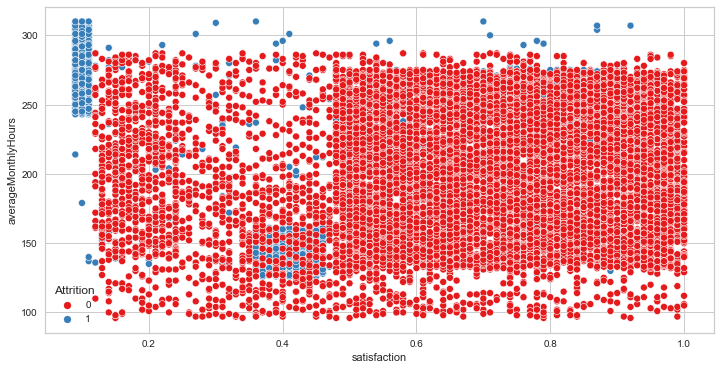

In [224]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df_Churn['satisfaction'],y=df_Churn['averageMonthlyHours'],hue=df_Churn['Attrition'],palette='Set1')
plt.show();

**Satisfaction VS Evaluation**<br>
- There are 3 distinct clusters for employees who left the company<br>
-- Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.<br>
-- Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35-0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.<br>
-- Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7-1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

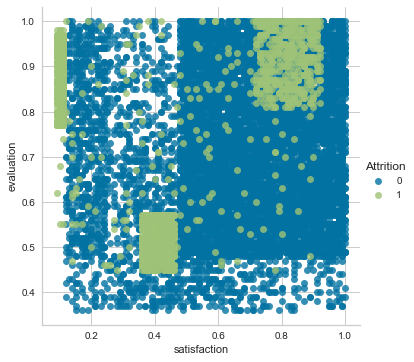

In [225]:
sns.lmplot(x='satisfaction', y='evaluation', data=df_Churn,
           fit_reg=False, # No regression line
           hue='Attrition');   # Color by evolution stage

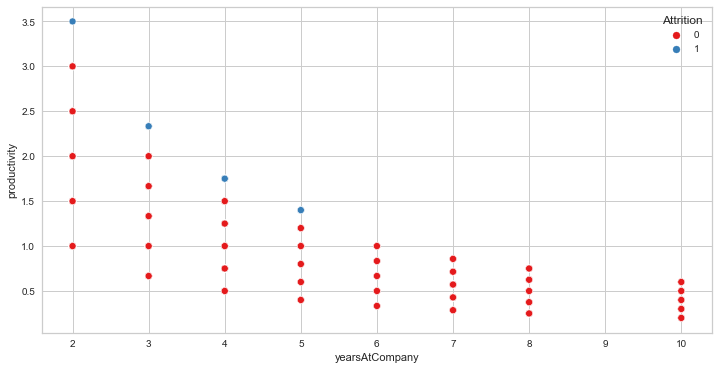

In [226]:
# It is obvious that workers tends to stay while the working years increase
plt.figure(figsize=[12,6])
sns.scatterplot(x=df_Churn['yearsAtCompany'],y=df_Churn['productivity'],hue=df_Churn['Attrition'],palette='Set1')
plt.show();

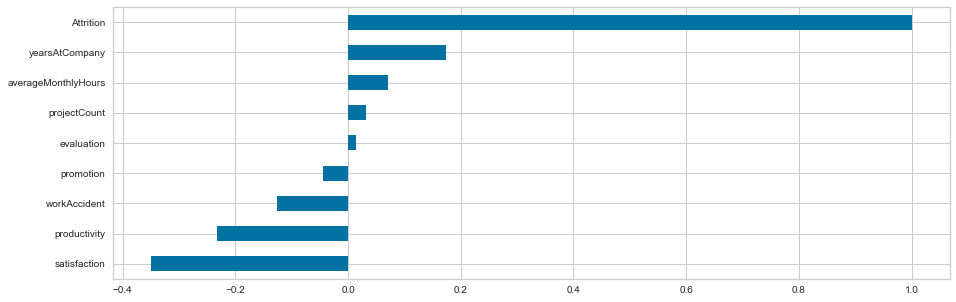

In [227]:
df_Churn.corr()["Attrition"].sort_values().plot.barh();

In [228]:
#df_Churn.number_project.value_counts()

**Attrition V.S. YearsAtCompany**<br>
- More than half of the employees with 4 and 5 years left the company<br>
- Employees with 5 years should highly be looked into

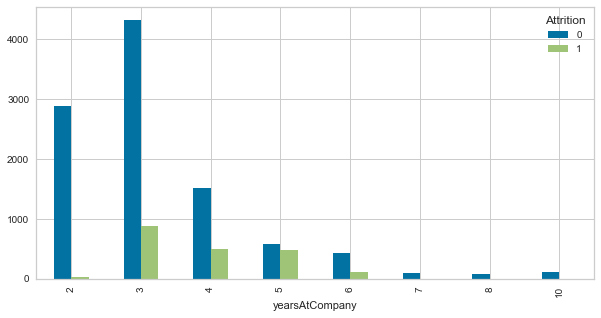

In [229]:
pd.crosstab(df_Churn['yearsAtCompany'],df_Churn['Attrition']).plot(kind='bar',figsize=(10,5));

<AxesSubplot:xlabel='satisfaction', ylabel='Density'>

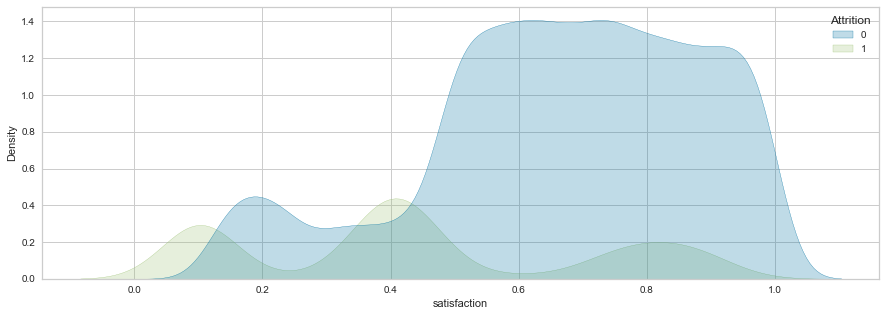

In [230]:
sns.kdeplot(data=df_Churn, x="satisfaction", hue="Attrition",shade=True)

In [231]:
df_Churn.groupby('projectCount').mean()

,satisfaction,evaluation,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion,productivity
projectCount,,,,,,,,
2,0.499071,0.584640,164.812263,3.186473,0.111252,0.541719,0.012010,0.669839
3,0.689418,0.717415,197.337784,3.144602,0.175852,0.010795,0.017614,1.078581
4,0.694280,0.735682,203.872456,3.300407,0.160651,0.064315,0.020624,1.375699
5,0.671155,0.750072,209.125392,3.604120,0.156740,0.153605,0.014778,1.588907
6,0.314673,0.765654,230.392252,4.154964,0.134383,0.449153,0.015738,1.563127
7,0.116690,0.863517,275.620690,4.110345,0.013793,1.000000,0.000000,1.723448


## 3. Data Pre-Processing

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



**labelencoder will not keep the order so we used replace method instead.**

In [232]:
#df["salary"] = df["salary"].apply(lambda x: 1 if x=="low" else 2 if x=="medium" else 3)

In [233]:
condition = {'low':0, 'medium':1, 'high':2}
df_Churn.salary = df.salary.replace(condition)

/Users/ademarslan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [234]:
df_Churn.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion,department,salary,productivity
0,0.38,0.53,2,157,3,0,1,0,sales,0,0.666667
1,0.80,0.86,5,262,6,0,1,0,sales,1,0.833333
2,0.11,0.88,7,272,4,0,1,0,sales,1,1.750000
3,0.72,0.87,5,223,5,0,1,0,sales,0,1.000000
4,0.37,0.52,2,159,3,0,1,0,sales,0,0.666667


**Other categorical data department has no order between the categories, in this case we will use getdummies()**

In [235]:
df_Churn = pd.get_dummies(df_Churn, columns = ['department'] , prefix_sep = "_",drop_first = True)
df_Churn.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion,salary,productivity,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.666667,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0.833333,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,1.750000,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1.000000,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0.666667,0,0,0,0,0,0,1,0,0


In [236]:
#df_Churn.salary.value_counts()

<AxesSubplot:>

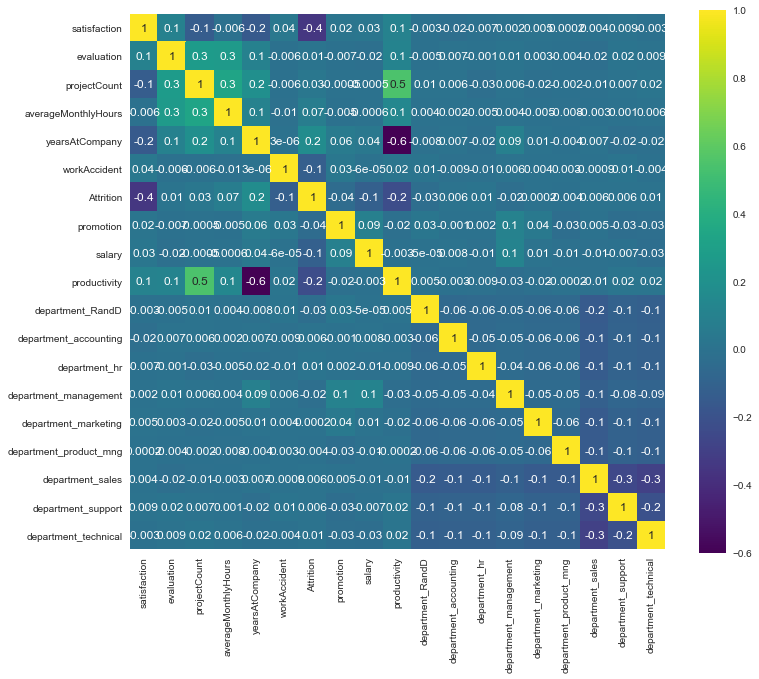

In [237]:
# create correlation plot for finding the best parameters after converting categorical variable to numeric variable.
plt.figure(figsize=(12,10))
sns.heatmap(df_Churn.corr(), annot=True,fmt='.1g', cmap='viridis',square=True)

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

## Feature Scaling
Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [158]:
df_Churn.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Attrition', 'promotion', 'salary',
       'productivity', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

**i. Create a new dataset with two variables of your choice**

**it is found that most important factor to leave the company is satisfaction, productivity and years at the company therefore I include only 3 features inmy cluster.**

In [239]:
df_cluster = df_Churn[df_Churn.Attrition==1][["satisfaction","evaluation"]]
df_cluster.head()

,satisfaction,evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [240]:
# Hopkins test measures the clustering tendency of a data set by measuring the probability that a given data set.
# if the value is close to 0, it means the dataset tends to cluster, if it is close to 1 that means dataset does not tend to cluster.
from pyclustertend import hopkins
hopkins(df_cluster,df_cluster.shape[0])

0.11655880797257576

**ii. Determine optimal number of clusters**

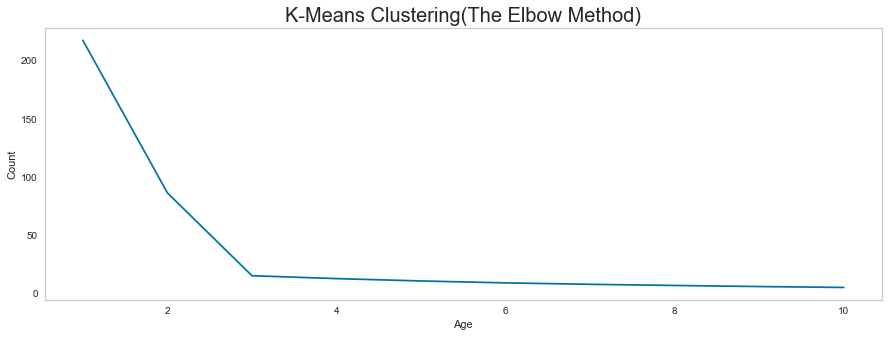

In [241]:
#Let's check optimal number of clusters by elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

In [242]:
#pip install -U yellowbrick
#conda update scikit-learn


**ii. Apply K Means**

In [243]:
kmeansmodel = KMeans(n_clusters=3)
y_means = kmeansmodel.fit_predict(df_cluster.values)
y_means

array([0, 1, 2, ..., 0, 1, 0], dtype=int32)

In [244]:
df_cluster['cluster'] = y_means
df_cluster.cluster.value_counts()

0    902
1    555
2    534
Name: cluster, dtype: int64

**iv. Visualizing and Labeling All the Clusters**

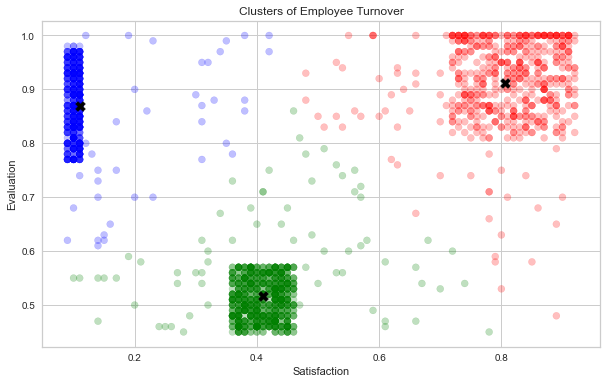

In [247]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_cluster[["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df_cluster,
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

## 5. Model Building

In [249]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,ShuffleSplit,KFold,cross_val_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [12]:
df_Churn.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Attrition', 'promotion',
       'department', 'salary', 'productivity', 'employer_satisfaction'],
      dtype='object')

In [248]:
df_Churn = df_Churn.drop('projectCount',axis=1)

In [250]:
X = df_Churn.drop('Attrition', axis = 1)
y = df_Churn['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [251]:
df_Churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            11991 non-null  float64
 1   evaluation              11991 non-null  float64
 2   averageMonthlyHours     11991 non-null  int64  
 3   yearsAtCompany          11991 non-null  int64  
 4   workAccident            11991 non-null  int64  
 5   Attrition               11991 non-null  int64  
 6   promotion               11991 non-null  int64  
 7   salary                  11991 non-null  int64  
 8   productivity            11991 non-null  float64
 9   department_RandD        11991 non-null  uint8  
 10  department_accounting   11991 non-null  uint8  
 11  department_hr           11991 non-null  uint8  
 12  department_management   11991 non-null  uint8  
 13  department_marketing    11991 non-null  uint8  
 14  department_product_mng  11991 non-null

**Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model**


## Baseline Algorithms<br>
Let's first use a range of **baseline** algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: **Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gradient Boosting Classifier.**

In [252]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier(learning_rate=0.1)))

In [253]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'F1 Score Mean', 'F1 Score STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_f1_results = model_selection.cross_val_score(  # f1_score scoring
        model, X_train, y_train, cv=kfold, scoring='f1')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_f1_results.mean()*100, 2),
                         round(cv_f1_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['F1 Score Mean'], ascending=False)


,Algorithm,F1 Score Mean,F1 Score STD,Accuracy Mean,Accuracy STD
1,Random Forest,94.33,1.37,98.19,0.47
5,Gradient Boosting Classifier,93.89,1.14,98.02,0.41
4,Decision Tree Classifier,90.95,1.78,96.99,0.61
2,SVM,82.04,2.09,94.16,0.85
3,KNN,74.93,1.57,91.42,0.80
0,Logistic Regression,56.60,2.78,78.17,1.02


## Fine-tuning

In [254]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='f1',
                        cv=5)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=4, n_estimators=50, random_state=7)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
best score: 0.9427444649713277


## Evaluation

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

Text(0.5, 320.8, 'Predicted label')

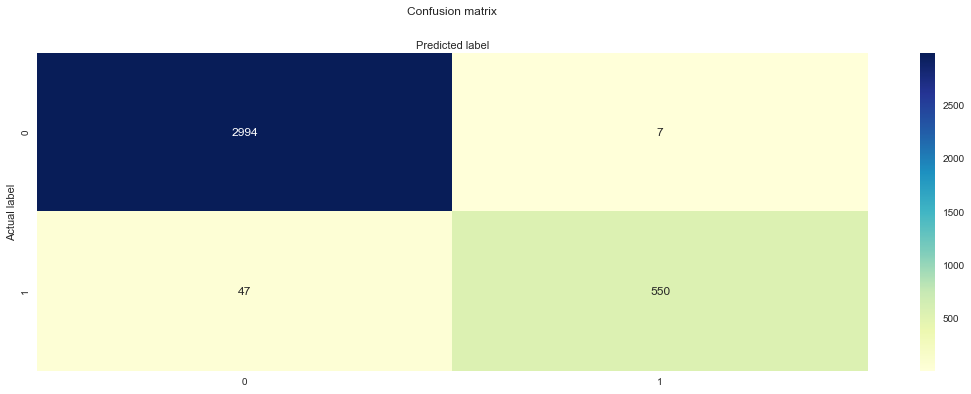

In [255]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [256]:
# Classification report for the optimised RF 
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.92      0.95       597

    accuracy                           0.98      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.98      0.98      3598



## Feature importance
Random Forest allows us to know which features are of the most importance in predicting the target feature ("attrition" in this project). Below, we plot features by their importance.

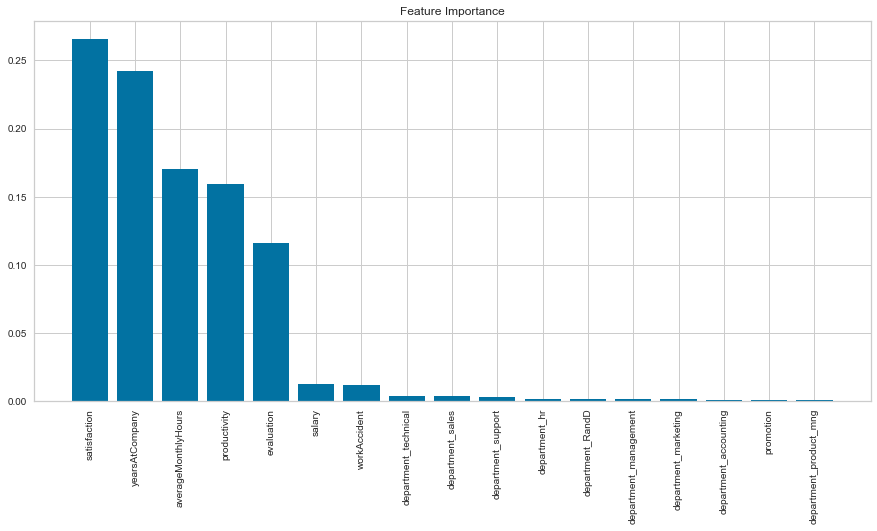

In [257]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [258]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(17):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(17)

,Feature,Coefficient
0,satisfaction,0.265637
1,yearsAtCompany,0.242560
2,averageMonthlyHours,0.170475
3,productivity,0.159192
4,evaluation,0.116090
5,salary,0.012812
6,workAccident,0.011901
7,department_technical,0.003815
8,department_sales,0.003813
9,department_support,0.003217


## Final Model
Random Forest model performe highest F1 score, I will use random forest for deployment. As it is seen in feature importance plot, few features dominates the model evaluation therefore in this section I will fit the model with selected features for clear deployment. 

In [188]:
df_final = df_Churn[['satisfaction', 'yearsAtCompany', 'productivity', 'averageMonthlyHours', 'evaluation', 'salary','Attrition']]

In [189]:
X = df_final.drop('Attrition',axis=1)
y = df_final['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [190]:
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.96
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3001
           1       0.99      0.92      0.96       597

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598



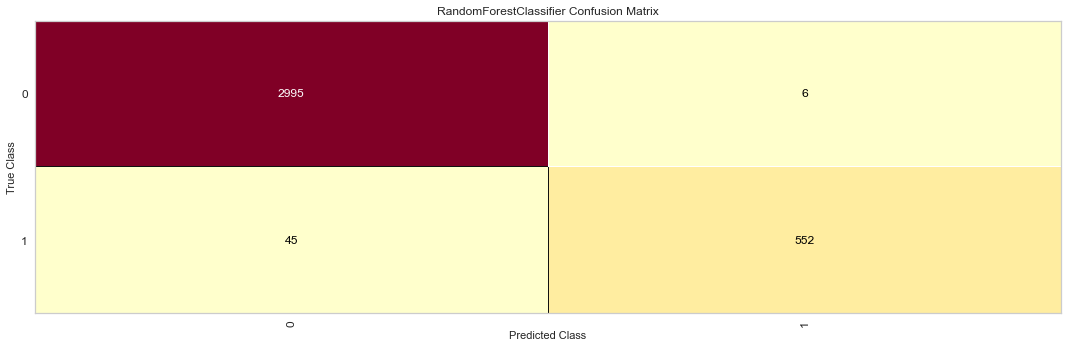

In [191]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

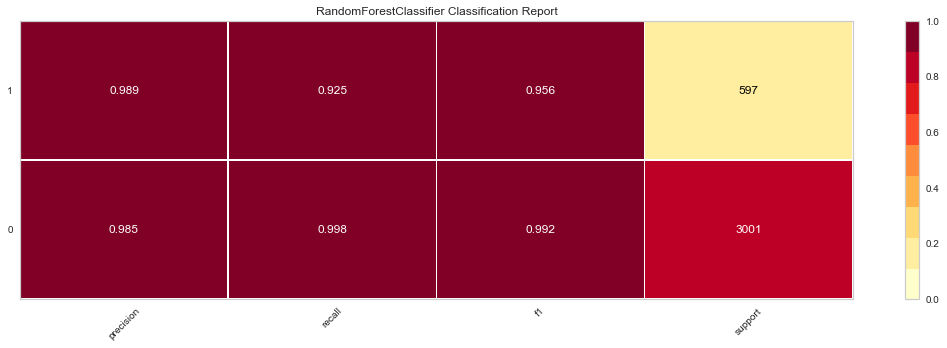

In [192]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

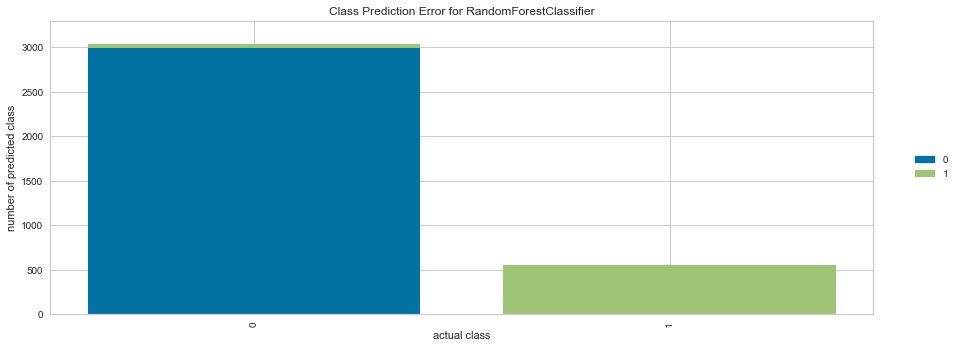

In [193]:
visualizer = ClassPredictionError(rf)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [194]:
import pickle 
pickle.dump(rf, open("rf_model", 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___